In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
# Upload ZIP file
uploaded =files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


In [3]:
#Load dataset
df = pd.read_csv('/content/heart_disease_uci.csv')

**EDA Questions:**

**1. General Information**

In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


* How many rows and columns are in the dataset?

In [5]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 920
Number of columns: 16


* What are the column names and their data types?

In [6]:
print(df.dtypes)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


* Are there any missing values in the dataset?

In [7]:
# Check for missing values in the dataset
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


**2. Target Variable Analysis**


* What is the distribution of the target variable (presence of heart disease: 0 or 1)?

Distribution of target variable (0 = No Heart Disease, 1 = Has Heart Disease):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


<ipython-input-23-a194cb4464a8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


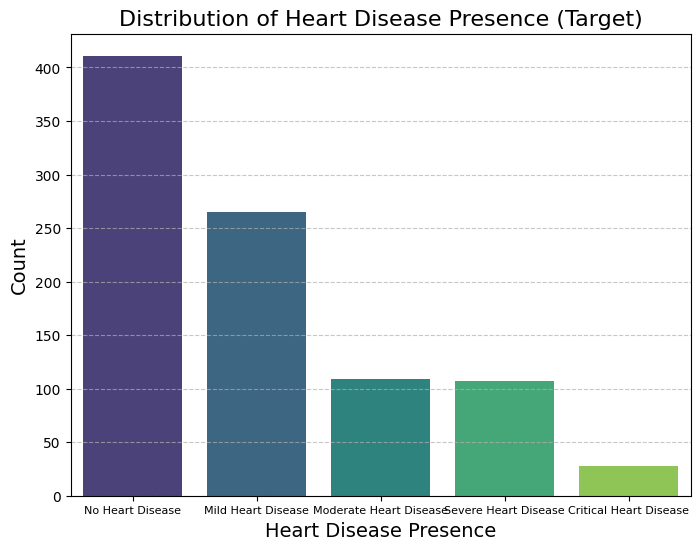

In [23]:
if 'num' in df.columns:
    # Count occurrences of each class
    target_counts = df['num'].value_counts()
    print("Distribution of target variable (0 = No Heart Disease, 1 = Has Heart Disease):")
    print(target_counts)

 # Plot the distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
    plt.title('Distribution of Heart Disease Presence (Target)', fontsize=16)
    plt.xlabel('Heart Disease Presence', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks([0, 1, 2, 3, 4], labels=['No Heart Disease', 'Mild Heart Disease', 'Moderate Heart Disease', 'Severe Heart Disease', 'Critical Heart Disease'], fontsize= 8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

* How many patients have heart disease, and how many don’t?

In [43]:
if 'num' in df.columns:
    # Count occurrences of each class
    no_heartdisease= df[df['num'] == 0]
    heart_disease= df[df['num'] != 0]
    print("Heart disease distribution:")
    print(f"Patients with heart disease: {sum(heart_disease['num'].value_counts())}")
    print(f"Patients without heart disease: {sum(no_heartdisease['num'].value_counts())}")
else:
    print("The column 'target' is not found in the dataset. Please check the column names.")

Heart disease distribution:
Patients with heart disease: 509
Patients without heart disease: 411


**3. Demographic Insights**

* What is the age range of patients in the dataset?

In [10]:
if 'age' in df.columns:
    # Calculate the age range
    min_age = df['age'].min()
    max_age = df['age'].max()
    print(f"The age range of patients is {min_age} to {max_age}.")
else:
    print("The column 'age' is not found in the dataset. Please check the column names.")

The age range of patients is 28 to 77.


* What is the gender distribution of the patients?

In [27]:
if 'sex' in df.columns:
    # Get the gender distribution
    sex_distribution = heart_disease['sex'].value_counts()
    print("Gender distribution of patients:")
    print(sex_distribution)
else:
    print("The column 'gender' is not found in the dataset. Please check the column names.")

Gender distribution of patients:
sex
Male      459
Female     50
Name: count, dtype: int64


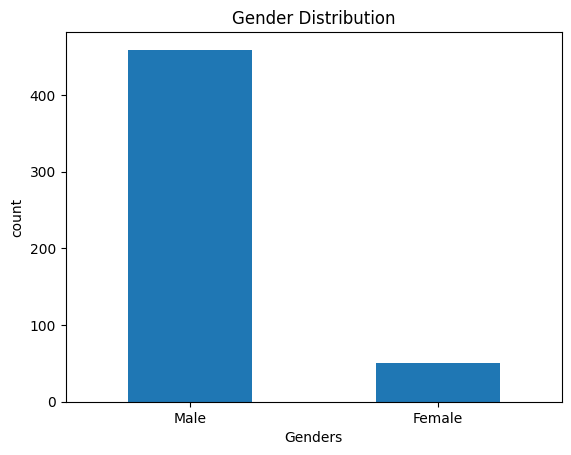

In [30]:
sex_distribution.plot(kind = "bar")
plt.title("Gender Distribution")
plt.xlabel("Genders")
plt.ylabel("count")
plt.xticks(rotation = False)
plt.show()

**4. Health Metrics**

* What are the average and median values of:

○ Resting blood pressure (trestbps)?
○ Serum cholesterol (chol)?
○ Maximum heart rate (thalch)?

In [12]:
reqd_columns= ['trestbps', 'chol', 'thalch']
for col in reqd_columns:
        avg_value = df[col].mean()
        median_value = df[col].median()
        print(f"For {col}:")
        print(f"  Average: {avg_value:.2f}")
        print(f"  Median: {median_value:.2f}\n")

For trestbps:
  Average: 132.13
  Median: 130.00

For chol:
  Average: 199.13
  Median: 223.00

For thalch:
  Average: 137.55
  Median: 140.00



**5. Categorical Features**

* How many patients have exercise-induced angina (exang)?

In [13]:
if 'exang' in df.columns:
    exang_count = df['exang'].sum()
    print(f"Number of patients with exercise-induced angina: {exang_count}")
else:
    print("The column 'exang' is not found in the dataset. Please check the column names.")

Number of patients with exercise-induced angina: 337


* What are the counts of different chest pain types (cp)?

In [14]:
if 'cp' in df.columns:
    # Count occurrences of each chest pain type
    cp_counts = df['cp'].value_counts()
    print("Counts of different chest pain types:")
    print(cp_counts)
else:
    print("The column 'cp' is not found in the dataset. Please check the column names.")

Counts of different chest pain types:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


**6. Visual Analysis**

* Plot the age distribution of the patients.

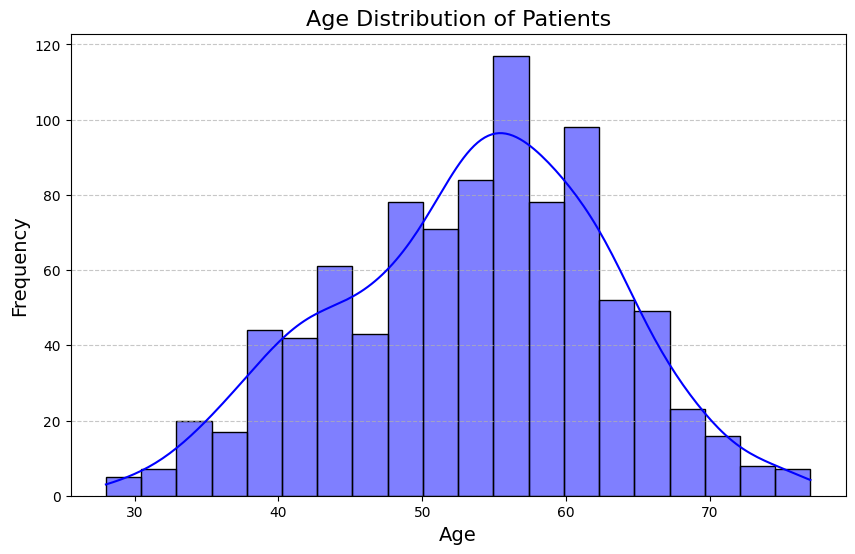

In [15]:
if 'age' in df.columns:
    # Plot the age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['age'], bins=20, kde=True, color='blue')
    plt.title('Age Distribution of Patients', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The column 'age' is not found in the dataset. Please check the column names.")

* Compare the average cholesterol levels between patients with and without heart
disease.

In [45]:
if 'chol' in df.columns and 'num' in df.columns:
    # Group by heart disease status and calculate the mean cholesterol levels
    heart_disease_mean= heart_disease['chol'].mean()
    print("Average cholesterol levels of patients:")
    print("With heart disease:", heart_disease_mean)

    no_heartdisease_mean= no_heartdisease['chol'].mean()
    print("Without heart disease:", no_heartdisease_mean)
else:
    print("The required columns 'chol' and/or 'num' are not found in the dataset. Please check the column names.")

Average cholesterol levels of patients:
With heart disease: 176.47991967871485
Without heart disease: 227.90561224489795


**7. Outliers**

* Are there any outliers in cholesterol (chol) or resting blood pressure (trestbps)?

Outliers in chol:
48     417.0
152    564.0
181    409.0
373    412.0
434    468.0
       ...  
818      0.0
819      0.0
822      0.0
839      0.0
840      0.0
Name: chol, Length: 183, dtype: float64
Total outliers in chol: 183



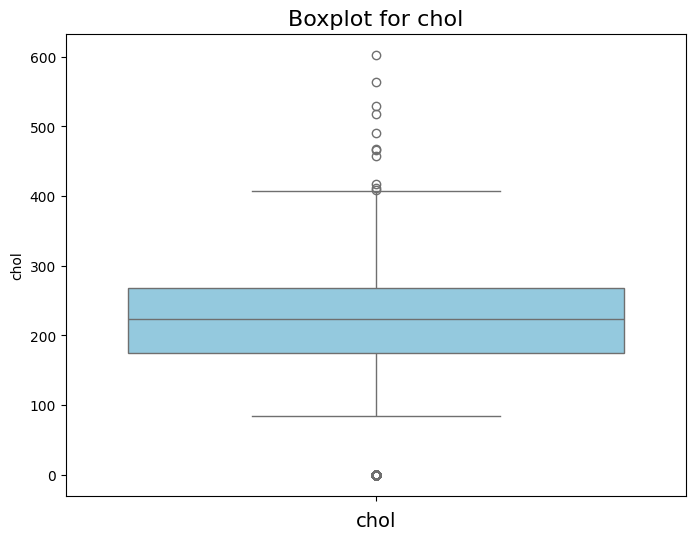

Outliers in trestbps:
14     172.0
83     180.0
126    200.0
172    174.0
183    178.0
188    192.0
201    180.0
213    178.0
231    180.0
338    190.0
375    180.0
387    180.0
475    180.0
484    180.0
548    200.0
569    180.0
595    180.0
644     80.0
647    180.0
680    200.0
700    185.0
701    200.0
727    180.0
753      0.0
779    178.0
854    172.0
889    180.0
896    190.0
Name: trestbps, dtype: float64
Total outliers in trestbps: 28



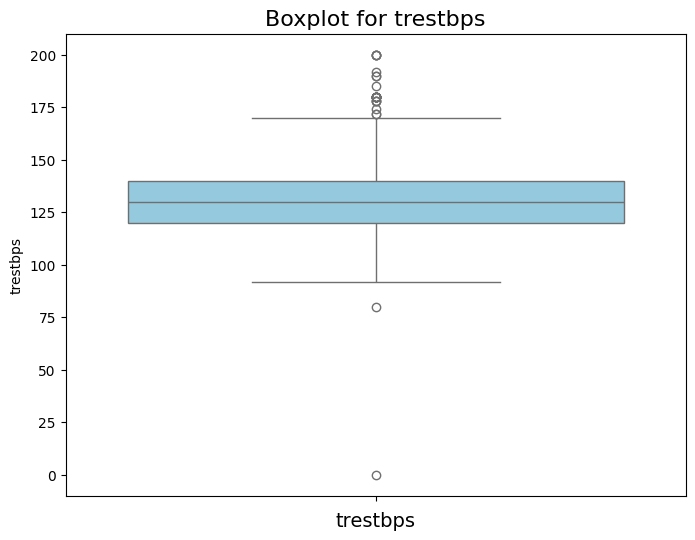

In [31]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1              # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

reqd_1_columns = ['chol', 'trestbps']
for col in reqd_1_columns:
        outliers = detect_outliers(df[col])
        print(f"Outliers in {col}:")
        print(outliers)
        print(f"Total outliers in {col}: {len(outliers)}\n")

        # Plot boxplot for visualizing outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(df[col], color='skyblue')

        plt.title(f'Boxplot for {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.show()